# Maths Lab - 1

## Teammates:
#### Akshita Potda - 702768460
#### Kalyani Khandait - 702768391
#### Logesh Gangadharan - 702723890

## 1. Loading and Getting to know the dataset

In [46]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


#  Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/JSE_Car_Lab.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the dataframe
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Understanding more about data

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [48]:
df.shape[0]

804

In [49]:
df.tail()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [50]:
df.isnull().sum()    # checking for null values

,0
Price,0
Mileage,0
Make,0
Model,0
Trim,0
Type,0
Cylinder,0
Liter,0
Doors,0
Cruise,0


In [51]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Milage')

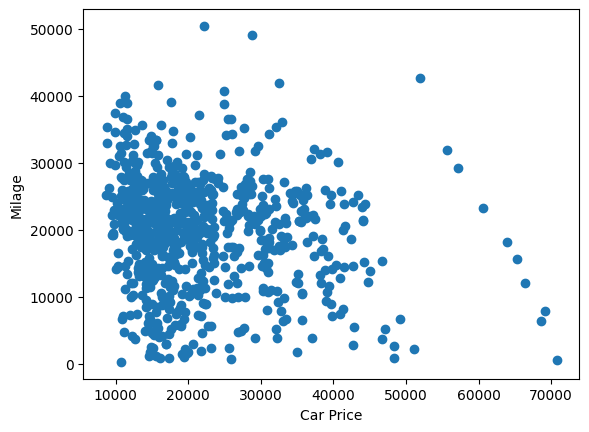

In [52]:
# scatter plot
plt.scatter(df['Price'],df['Mileage'])
plt.xlabel("Car Price")
plt.ylabel("Milage")

In [53]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## 2. Regression with the price on mileage

In [54]:
y = np.array(df['Price'])
x = np.array(df['Mileage'])
x = x.reshape(len(x),1)

from sklearn.linear_model import LinearRegression
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(x,y)
print(lin_model.coef_)
print(lin_model.intercept_)


[-0.1725205]
24764.55900606168


####Root Mean Square Error (RMSE)

In [55]:
residuals = y-lin_model.predict(x)
RMSE = np.sqrt((residuals**2).mean())
print('RMSE:', RMSE)

RMSE: 9777.104975344371


### Identifing and Removing the outliers

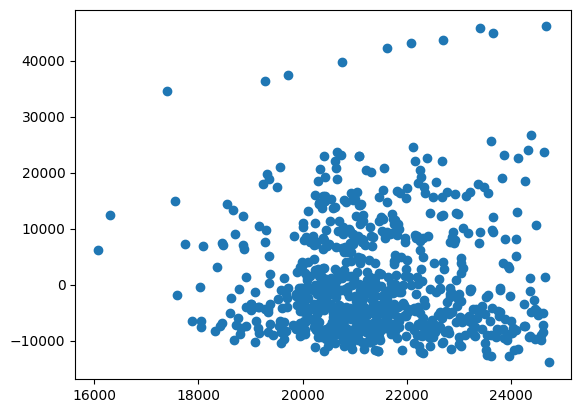

In [56]:
import matplotlib.pyplot as plt
plt.scatter(lin_model.predict(x),residuals)         #predicted price of the cars

In [57]:
idx = np.where(residuals > 30000)     # locating the residuala
df.iloc[idx]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466717,583,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
151,68566.187189,6420,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
152,69133.731722,7892,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
153,66374.307040,12021,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
154,65281.481237,15600,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
155,63913.117248,18200,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
156,60567.549093,23193,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
157,57154.443437,29260,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
158,55639.087654,31805,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,0,1
159,52001.994379,42691,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1


In [58]:
# Dropping the ouliers
df = df.drop(df.index[idx])

In [59]:
df.shape[0]

794

In [60]:
# Define new x and y
y_cleaned = np.array(df['Price'])
x_cleaned = np.array(df['Mileage']).reshape(len(df['Mileage']), 1)

# Refit the model
lin_model_cleaned = LinearRegression(fit_intercept=True)
lin_model_cleaned.fit(x_cleaned, y_cleaned)

residuals_cleaned = y_cleaned - lin_model_cleaned.predict(x_cleaned)
RMSE_cleaned= np.sqrt((residuals_cleaned**2).mean())
print('RMSE after removing outliers:', RMSE_cleaned)



RMSE after removing outliers: 8643.664297888203


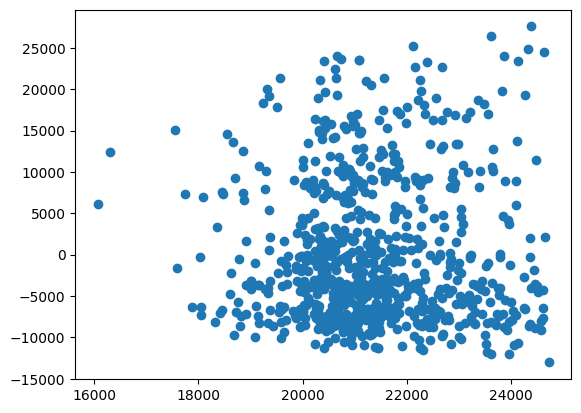

In [61]:
# New pridicted price  without outliers
plt.scatter(lin_model.predict(x_cleaned),residuals_cleaned)

###2. Adding more parameters

In [62]:
df['Mileage2']= df['Mileage']**2        # adding these columns to increase the complexity
df['Cylinder2']= df['Cylinder']**3
df['Sound2']= df['Sound']**3

X_poly=df[['Mileage', 'Mileage2','Cylinder', 'Cylinder2','Doors', 'Cruise', 'Sound','Sound2', 'Leather','Liter',]]
Y_poly=df['Price']


# Splitting into train test data
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y_poly, test_size=0.25, random_state=32)
lin_model_poly = LinearRegression(fit_intercept=True)
lin_model_poly.fit(X_train_poly, Y_train_poly)


score_poly = lin_model_poly.score(X_test_poly, Y_test_poly)
print("R^2 with Mileage^2 on Test Set:", score_poly)

# score before was R^2 on Test Set: 0.03749891192537713
# R^2 with Mileage^2 and Mileage^3 on Test Set: 0.03034930279985537
# R^2 with Mileage^2 on Test Set: 0.02747651473765067    ---> this gives samlles value

R^2 with Mileage^2 on Test Set: 0.5482421392968191


##3. Dividing Data Into Categories

Text(0, 0.5, 'Milage')

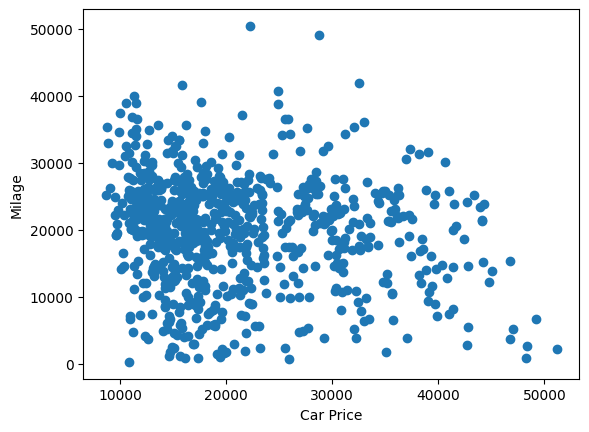

In [63]:
# scatter plot
plt.scatter(df['Price'],df['Mileage'])
plt.xlabel("Car Price")
plt.ylabel("Milage")

{'whiskers': [<matplotlib.lines.Line2D at 0x7e65ae7d0610>,
 'caps': [<matplotlib.lines.Line2D at 0x7e65ae7d2f80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e65ae7d2ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e65ae7d1b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e65ae7d11b0>],
 'means': []}

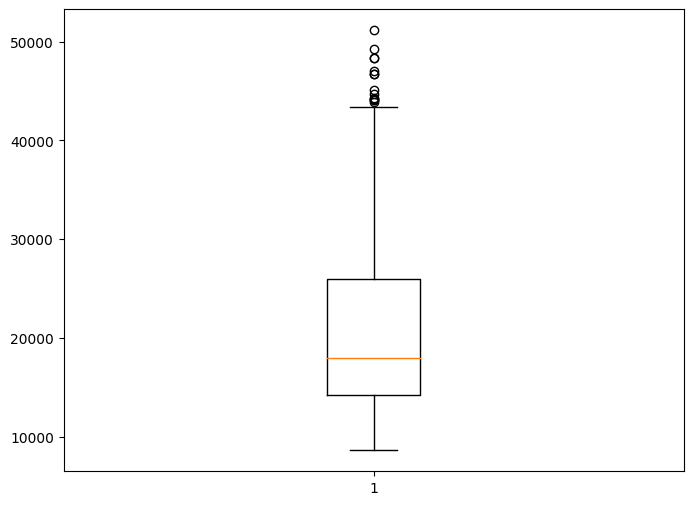

In [64]:
# box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'])



#### cheap

In [65]:
df_cheap = df[df['Price'] < 30000] # Considering cheap cars

In [66]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage2,Cylinder2,Sound2
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,67584841,216,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,83448225,216,1
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,174134416,216,1
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,267060964,216,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,393308224,216,0


In [67]:
# considering the same variables before categorizing

y = df_cheap.Price
x = df_cheap[['Mileage', 'Mileage2','Cylinder', 'Cylinder2','Doors', 'Cruise', 'Sound','Sound2', 'Leather','Liter',]]

X_train, X_test, y_train, y_test = train_test_split(x ,y, test_size=0.20, random_state=32)


lin_model_cheap = LinearRegression(fit_intercept=True)
lin_model_cheap.fit(X_train, y_train)

# prediction
y_pred = lin_model_cheap.predict(X_test)

# R² score on the test set
r2_test = r2_score(y_test, y_pred)
print("R² Score on Test Set:", r2_test)

R² Score on Test Set: 0.31848524194597116


In [68]:
np.sqrt(((y-lin_model_cheap.predict(x)) ** 2).mean()) # Root Mean Square Error

3924.145865696703

#### expensive

In [69]:
df_expensive = df[df['Price'] >= 30000] # considering Expensive cars

In [70]:
df_expensive.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage2,Cylinder2,Sound2
80,51154.047216,2202,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,1,1,4848804,512,1
81,49248.158967,6685,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,0,1,44689225,512,0
82,46747.673270,15343,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,1,1,235407649,512,1
83,44130.617055,21341,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,0,1,455438281,512,0
84,44084.914212,21367,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,1,1,456548689,512,1


In [71]:
y = df_expensive.Price
x = df_expensive[['Mileage', 'Mileage2','Cylinder', 'Cylinder2','Doors', 'Cruise', 'Sound','Sound2', 'Leather','Liter',]]


X_train, X_test, y_train, y_test = train_test_split(x ,y, test_size=0.20, random_state=32)

lin_model_expensive= LinearRegression(fit_intercept=True)
lin_model_expensive.fit(X_train, y_train)

# predictions on the test set
y_pred = lin_model_expensive.predict(X_test)

# R² score on the test set
r2_test = r2_score(y_test, y_pred)
print("R² Score on Test Set:", r2_test)


# as the r^2 value is low we try to encode other parameters into the model

R² Score on Test Set: 0.38723618089154366


In [72]:
np.sqrt(((y-lin_model_expensive.predict(x)) ** 2).mean()) # Root Mean Square Error

3506.2075305866088

## 4. Categorical variables conversion  using One Hot Encoding

In [73]:
# one Hot for Make and Type

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df_cheap = pd.get_dummies(df_cheap, columns = ['Make'], drop_first = True)      #droping first columns
df_cheap = df_cheap.replace({False: 0, True: 1})

In [74]:
# for Type
df_cheap = pd.get_dummies(df_cheap, columns = ['Type'], drop_first = True)
df_cheap = df_cheap.replace({False: 0, True: 1})

In [75]:
# Label Encoding for Model and Trim

from sklearn.preprocessing import LabelEncoder # Import

label_encoder = LabelEncoder()

df_cheap['Model_encoded'] = label_encoder.fit_transform(df_cheap['Model'])
df_cheap = df_cheap.drop('Model', axis = 1)




In [76]:
# For Trim
label_encoder = LabelEncoder()

df_cheap['Trim_encoded'] = label_encoder.fit_transform(df_cheap['Trim'])
df_cheap = df_cheap.drop('Trim', axis = 1)



In [77]:
df_cheap.shape[0]

654

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Fit the model only on the cheap category
y = df_cheap.Price
x = df_cheap.drop('Price', axis = 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

lin_model_6 = LinearRegression(fit_intercept = True) # LinearRegression
lin_model_6.fit(X_train, y_train)

print(lin_model_6.coef_)
print(lin_model_6.intercept_)



[-1.26796247e-01 -2.25993506e+03  4.37762522e+03 -2.22127953e+03
  4.27922239e+02 -7.53182922e+01  1.16144880e+02 -1.36929115e-07
  1.73439616e+01 -7.53182922e+01  1.26708462e+04 -1.79789204e+03
 -1.55199206e+03  1.14655994e+04 -1.98100388e+03 -5.77807422e+03
 -1.33557442e+03 -8.86881463e+02  1.11181612e+03  6.79582101e+01
 -4.56762834e+00]
25365.406233024733


In [79]:
print('RMSE of train data is', np.sqrt(((y_train-lin_model_6.predict(X_train)) ** 2).mean())) # Root Mean Square Error
print('RMSE of test data is', np.sqrt(((y_test-lin_model_6.predict(X_test)) ** 2).mean())) # Root Mean Square Error

RMSE of train data is 1525.9743637491142
RMSE of test data is 1447.4098867247267


In [86]:
# r2_score Evaluation

from sklearn.metrics import r2_score

print('R2_score for train data', r2_score(y_train, lin_model_6.predict(X_train)))
print('R2_score for test data', r2_score(y_test, lin_model_6.predict(X_test)))


# Final r2_score Evaluation is close to one thus this model can give us prety good results.

R2_score for train data 0.9101677440182728
R2_score for test data 0.9138608349140784


##5. Exploring More

In [81]:
df.shape[0]


794

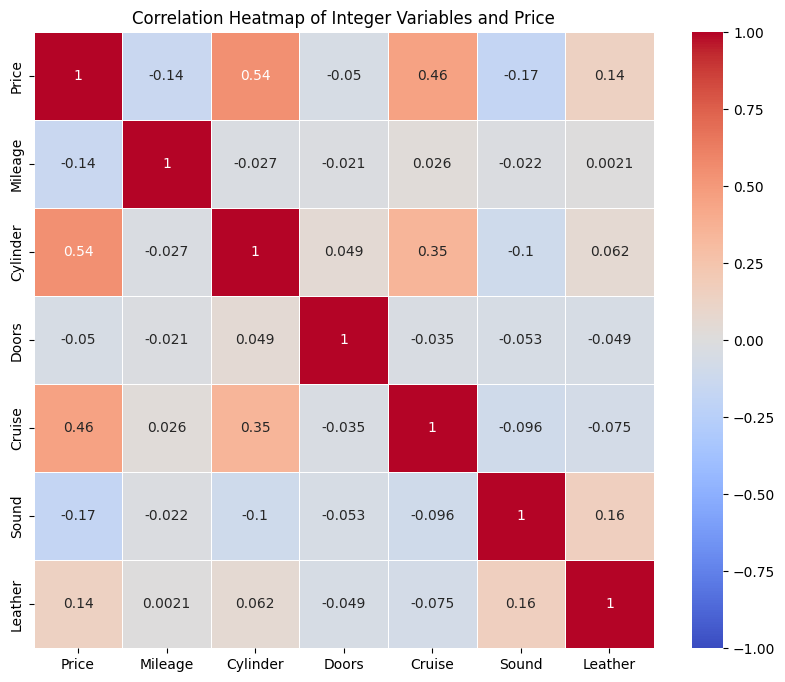

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

int_columns = df[['Price', 'Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']]

# Generate a correlation matrix for these columns
corr_matrix = int_columns.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Heatmap of Integer Variables and Price')

# Show the heatmap
plt.show()


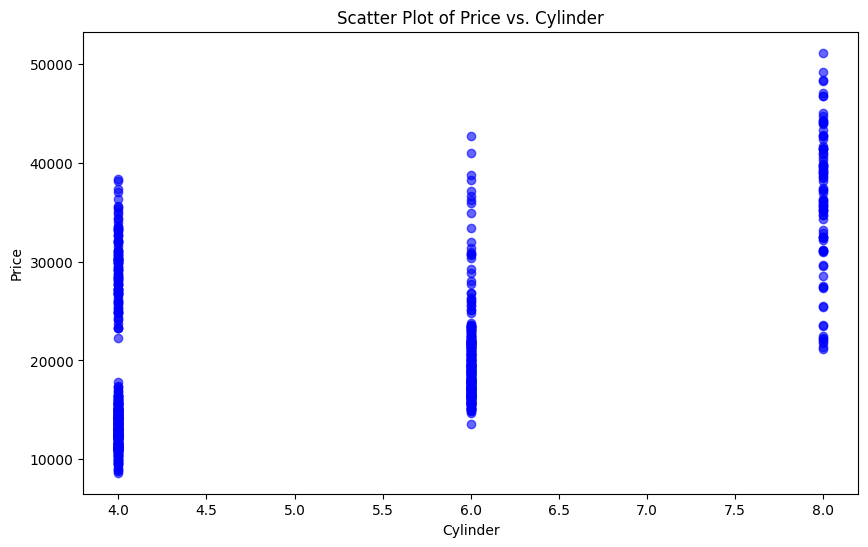

In [83]:
#  we see there might be some corelation between price and cylinders so just plot their graph

plt.figure(figsize=(10, 6))
plt.scatter(df['Cylinder'], df['Price'], color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Cylinder')

# Display the plot
plt.show()


# here in the graph they are not directly in linear relation with one another
# for working under the linear model, here we assume that for each value of x y is normally distribute.
# thus we take mean of y at each x, and then run on the model

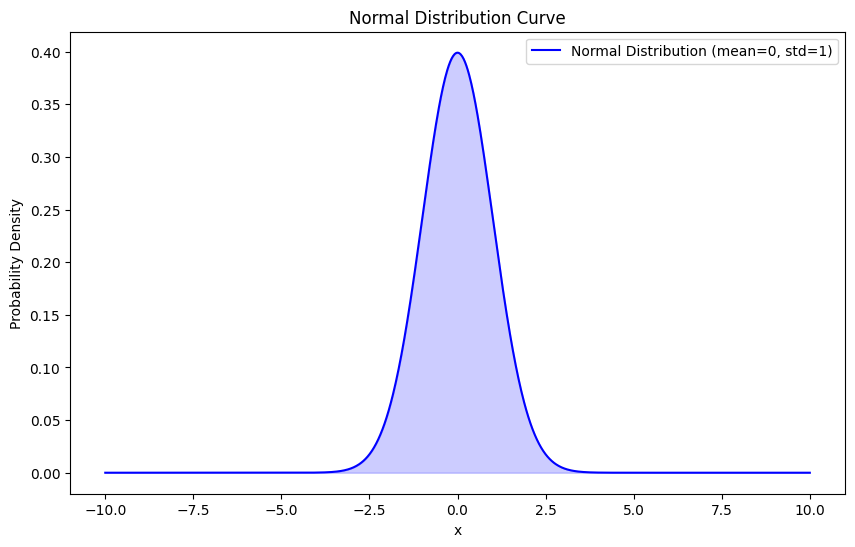

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the range of x values
x = np.linspace(-10, 10, 1000)  # Generate 1000 points between -10 and 10

# Define the mean and standard deviation
mean = 0   # Mean of the distribution
std = 1    # Standard deviation of the distribution

#  Calculate the normal distribution for each x value
y = stats.norm.pdf(x, mean, std)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', label='Normal Distribution (mean=0, std=1)')
plt.fill_between(x, y, color='blue', alpha=0.2)  # Optional shading under the curve

# titles and labels
plt.title('Normal Distribution Curve')
plt.xlabel('x')
plt.ylabel('Probability Density')

#Display the plot
plt.legend()
plt.show()


# This shows that at each value of cylinders the value is normally distributed
# ....  this garph taken from chat.gpt for presentation and clear understanding.

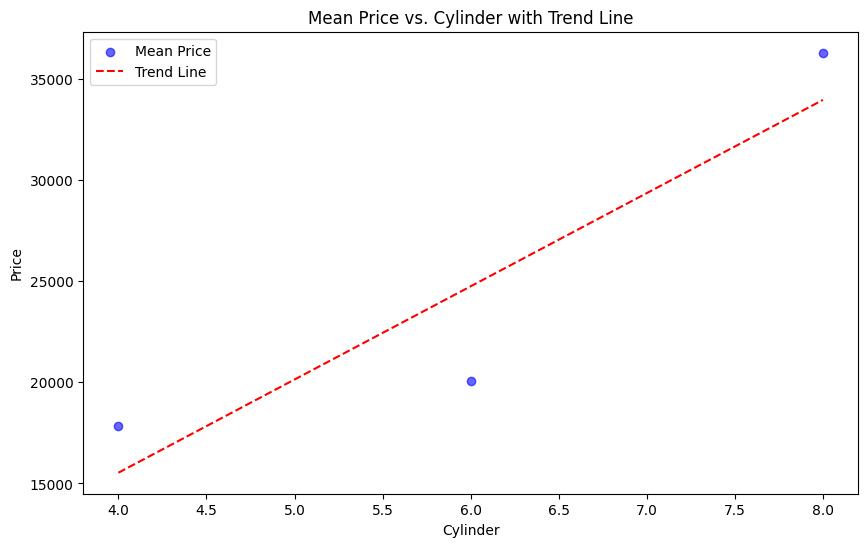

In [85]:

# Calculating the mean Price for each Cylinder value
mean_price_per_cylinder = df.groupby('Cylinder')['Price'].mean().reset_index()

# Plot the mean Price vs. Cylinder
plt.figure(figsize=(10, 6))
plt.scatter(mean_price_per_cylinder['Cylinder'], mean_price_per_cylinder['Price'], color='blue', alpha=0.6, label='Mean Price')

# Fit a linear model to the mean values
from sklearn.linear_model import LinearRegression

X = mean_price_per_cylinder[['Cylinder']]
y = mean_price_per_cylinder['Price']
model = LinearRegression().fit(X, y)
trend_line = model.predict(X)

plt.plot(mean_price_per_cylinder['Cylinder'], trend_line, color='red', linestyle='--', label='Trend Line')

# Adding labels and title
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.title('Mean Price vs. Cylinder with Trend Line')
plt.legend()

# Display the plot
plt.show()


# we can use linear regression here but this does not give gaurantee that we will get higher accuracy.